<a href="https://colab.research.google.com/github/orlandhopes2023/Curso-HCSPD/blob/main/Vargas_Reales_Orlando_Del_Valle_M1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO SEMANA 2-Modelo Avion

# Introduccion

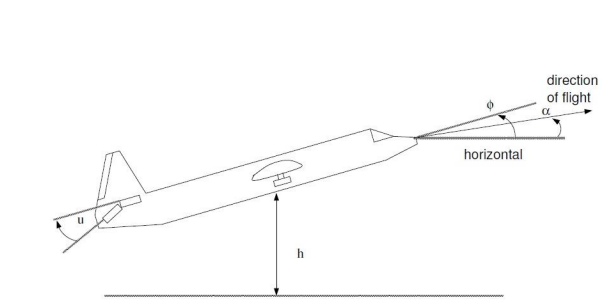


## Sistema de Ecuaciones Lineales

Sabiendo que un sistema lineal en variables de estado tiene la representación

$$
\dot{x}(t) = A x(t) + B u(t) \\
y(t) = C x(t) + D u(t)
$$

donde $ x \in \mathbb{R}^n $, $ u \in \mathbb{R}^m $, $ y \in \mathbb{R}^s $, con $ x_0 = x(0) $, y donde $ A ,  B ,  C $ y $ D $ son las matrices de estados, entrada, salida y acople directo respectivamente, se propone escribir en esta forma al siguiente sistema de ecuaciones lineales.

Para el caso de la Fig. 2-1, modelo válido sólo para pequeños ángulos, se tiene

$$
\begin{cases}
\dot{x}_1(t) = a x_2(t)-ax_1(t) \\
\dot{x}_2(t) = x_3(t) \\
\dot{x}_3(t) = -\omega^2 x_2(t) + \omega^2 x_1(t)+\omega^2bu \\
\dot{x}_4(t) = cx_1(t)
\end{cases}
$$

donde $ \omega > 0 $ representa la frecuencia natural, y los coeficientes $ a $ y $b $ son constantes positivas, $ u $ es la variable manipulada y es proporcional a la posición de los elevadores, $ \phi $ (ángulo de cabeceo) en radianes, vuela a $ c $ metros por segundo, su trayectoria de vuelo forma un ángulo $\alpha $ con la horizontal (si $ \alpha > 0$ sube, si $ \alpha < 0 $desciende). Elegir $ x_1 = \alpha $, $ x_2 = \phi $, $ x_3 = \dot{\phi} $ y $ x_4 = h $.

Podemos escribir el sistema de ecuaciones como :

$$
\dot{x}(t) = A x(t) + B u(t)
$$

donde:

$$
x(t) = \begin{bmatrix}
\alpha(t) \\
\phi(t) \\
\dot{\phi}(t) \\
h(t)
\end{bmatrix}, \quad
A = \begin{bmatrix}
-a & a& 0 & 0 \\
0 & 0 & 1 & 0 \\
\omega^2 & -\omega^2 & 0 & 0 \\
c & 0 & 0 & 0
\end{bmatrix}, \quad
B = \begin{bmatrix}
0 \\
0 \\
\omega^2bu \\
0
\end{bmatrix}
$$



## En equilibrio

Cuando $x(t)=\vec{0}$, se tiene que $\dot{\vec{x}}= \begin{bmatrix}
0 \\
0 \\
\omega^2bu \\
0
\end{bmatrix}$

## Actividades
Para evaluar cuantitativamente el comportamiento del sistema lineal y verificar el correcto planteo, se realizarán las siguientes simulaciones:

1. **Solución numérica del sistema lineal con los siguientes parámetros:**
   - $\omega = 0.2$
   - $a = 0.01$
   - $b = 2$
   - $c = 100 \text{ m/s}$ (es decir, 360Km/h)
   - $\Delta t = 10^{-3}$
   - Tiempo de simulación: 5 segundos

2. **Solución numérica del sistema lineal para $c = 50 \text{ m/s}$ (es decir, 180Km/h):**
   - $\Delta t = 10^{-3}$
   - Tiempo de simulación: 20 segundos

#Simulacion

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [ ]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
python3-sympy is already the newest version (1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
%%writefile Inst_S.m
pkg install -forge symbolic

Overwriting Inst_S.m


In [ ]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [ ]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


##Definiciones de algunas entradas




*   Impulso unitario



In [ ]:
%%writefile impunit.m
function y = impunit(t,a)
    y=0;
    if t==a
      y=1;
    end                        % Inicializar el vector y con ceros
end

Overwriting impunit.m


* Onda cuadrada

In [ ]:
%%writefile ondacuad.m
function[Vs]=ondacuad(Ve,t)
  % Parámetros de la onda cuadrada
  frecuencia = 500; % frecuencia en Hz (1 ciclo por segundo)
  periodo = 1 / frecuencia; % período en segundos
  duty= 50; % ciclo de trabajo del 50% (onda simétrica)

  % Generar la onda cuadrada
  onda_cuadrada = Ve*(duty/100 * (1 + sign(sin(2*pi*frecuencia*t))) - (1-duty/100)* (1 - sign(sin(2*pi*frecuencia*t))));
  Vs = [onda_cuadrada]; % x1 corriente, x2 tensión
end

Overwriting ondacuad.m


In [ ]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');

%Definicion condiciones INICIALES
Xsim1=[0;0;0;0]
Xsim2=[0;0;0;0]

Xsim=[Xsim1,Xsim2]

%Tiempo de simulacion
tF=[5,20];
t_etapa=tF/1000

%Parametros para muestra de graficas
color_='r';
color='b';
tamano1=2
tamano2=3

%Parametros Avion_Num
omega=0.2
a=[0.01,0.01]
b=[2,2]
c=[100,50]
u=[1,1]

Ts=t_etapa;

%%Simulaciones
s=0
ii=0;

%Para Grafico_simbolic
% Preallocating arrays for results
num_steps = tF(1,1) / t_etapa(1,1) ;
x1 = zeros(num_steps, size(Xsim(1,:)));
x2 = zeros(num_steps, size(Xsim(1,:)));
x3 = zeros(num_steps, size(Xsim(1,:)));
x4 = zeros(num_steps, size(Xsim(1,:)));
acc = zeros(num_steps, size(Xsim(1,:)));
for j=1:size(Xsim)(2)
  s=s+1
  disp(sprintf('Size of x2: %d x %d', size(x2, 1), size(x2, 2)));
  for t=0:t_etapa(1,s):tF(1,s) %Misma cantidad de etapas y mismo paso por etapas
    ii=ii+1;
    x1(ii,s) = Xsim(1, s); % Angulo de ataque
    x2(ii,s) = Xsim(2, s); % Ángulo fi
    x3(ii,s) = Xsim(3, s); % Derivada Ángulo fi
    x4(ii,s) = Xsim(4, s); % Altura
    Xsim(:,s)=modavion(t_etapa(1,s), Xsim(:,s), u(s),a(s),b(s),c(s),omega);
    acc(ii,s)=u(s);
  end
  ii=0%Reinicializamos
  disp(sprintf('Size of x2: %d x %d', size(x2, 1), size(x2, 2)));
end

%GRAFICO
t=0:t_etapa(1,s):tF(1,s);

disp(sprintf('Size of x2: %d x %d, Size of t: %d', size(x2, 1), size(x2, 2), length(t)));




% RESPUESTA AVION GRAFICAS SIMULACION 1
for si = 1:size(Xsim)(2)
    hfig = figure(si); set(hfig, 'Visible', 'off');
    % PHI

    subplot(3, 1, 1);
    title(sprintf('Simulacion %d',si))
    hold on;
    plot(t, x2(:, si), color_,'LineWidth', tamano2);
    xlabel('t [s]')
    ylabel('x_2 phi, x3 dotphi '); hold on;
    plot(t, x3(:, si), color,'LineWidth', tamano1); hold on;
    legend('phi', 'dotphi');  % Asigna nombres a cada serie
    grid on

    % ALTURA
    subplot(3, 1, 2); hold on;
    plot(t, x4(:, si), color_,'LineWidth', tamano1);
    xlabel('t [s]');
    ylabel('Altura (x_4) [m]');
    grid on

    % ENTRADA-PERTURBACION
    subplot(3, 1, 3); hold on;
    plot(t, acc(:, si), color_,'LineWidth', tamano1);
    xlabel('t [s]');
    ylabel('Entrada/Perturbacion (u)');
    grid on

    print(hfig, sprintf('Simavion%d', si), '-r300', '-dpng');
end

save('Verificacion_Num_1Avion.mat', '-v7');

Overwriting Avion_Num.m


In [ ]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion,a,b,c,omega)
%xant=[alfa,fi,fi_p,h]
At=t_etapa/2;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;

for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Overwriting modavion.m


In [ ]:
# -W : no window system
!octave -W Avion_Num.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

Xsim1 =

   0
   0
   0
   0

Xsim2 =

   0
   0
   0
   0

Xsim =

   0   0
   0   0
   0   0
   0   0

t_etapa =

   5.0000e-03   2.0000e-02

tamano1 = 2
tamano2 = 3
omega = 0.2000
a =

   0.010000   0.010000

b =

   2   2

c =

   100    50

u =

   1   1

s = 0
s = 1
Size of x2: 1000 x 1
ii = 0
Size of x2: 1001 x 1
s = 2
Size of x2: 1001 x 1
ii = 0
Size of x2: 1001 x 2
Size of x2: 1001 x 2, Size of t: 1001


# Resultados

En la primera simulacion como se simulo:
   - $\omega = 0.2$
   - $a = 0.01$
   - $b = 2$
   - $c = 100 \text{ m/s}$ (es decir, 360Km/h)
   - $\Delta t = 10^{-3}$
   - Tiempo de simulación: 5 segundos


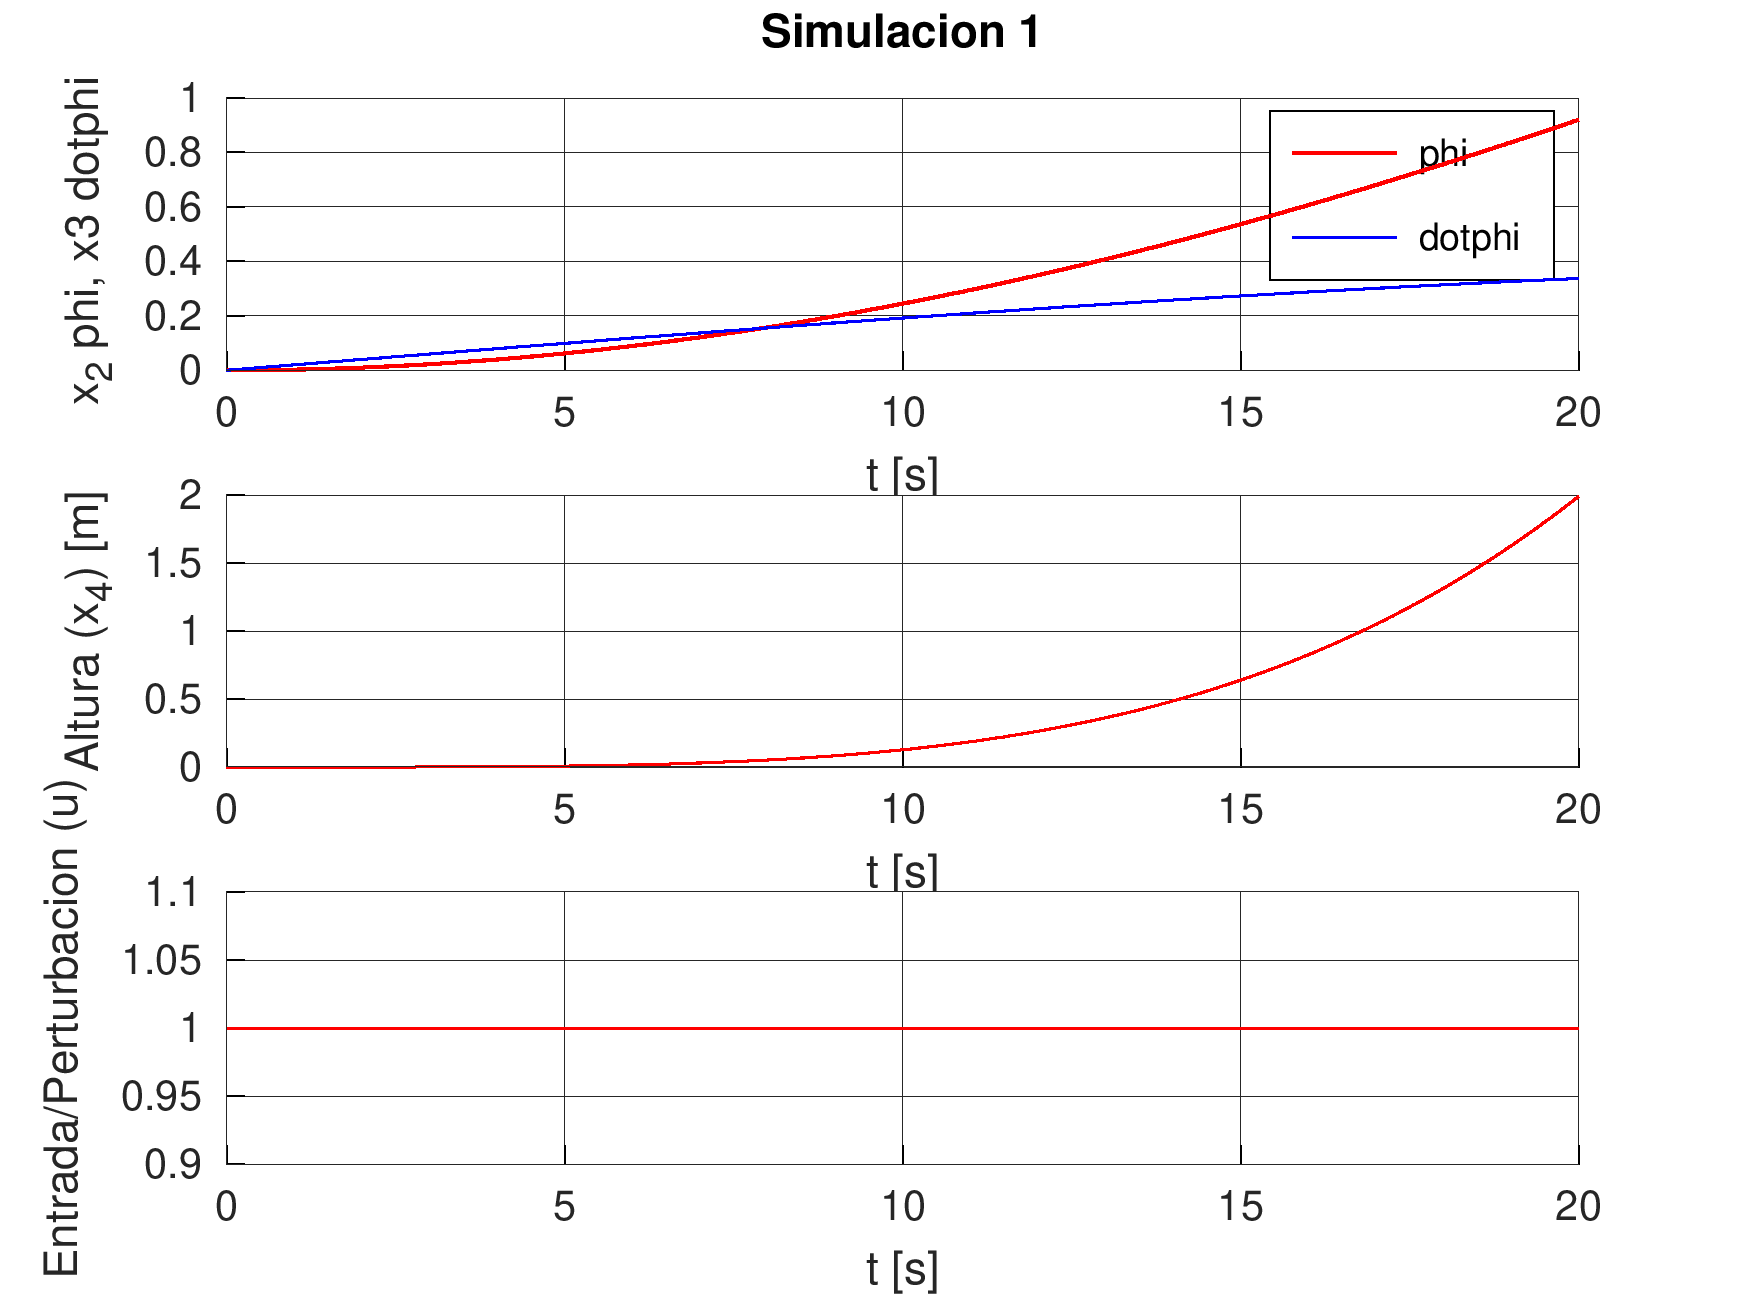

In [ ]:
from PIL import Image
imt = Image.open("/content/Simavion1.png")
imt

## Segunda simulacion

 En la segunda simulacion se tuvo en cuenta los siguientes parametros:
   - $\omega = 0.2$
   - $a = 0.01$
   - $b = 2$
   - $c = 50 \text{ m/s}$ (es decir, 180Km/h)
   - $\Delta t = 10^{-3}$
   - Tiempo de simulación: 5 segundos


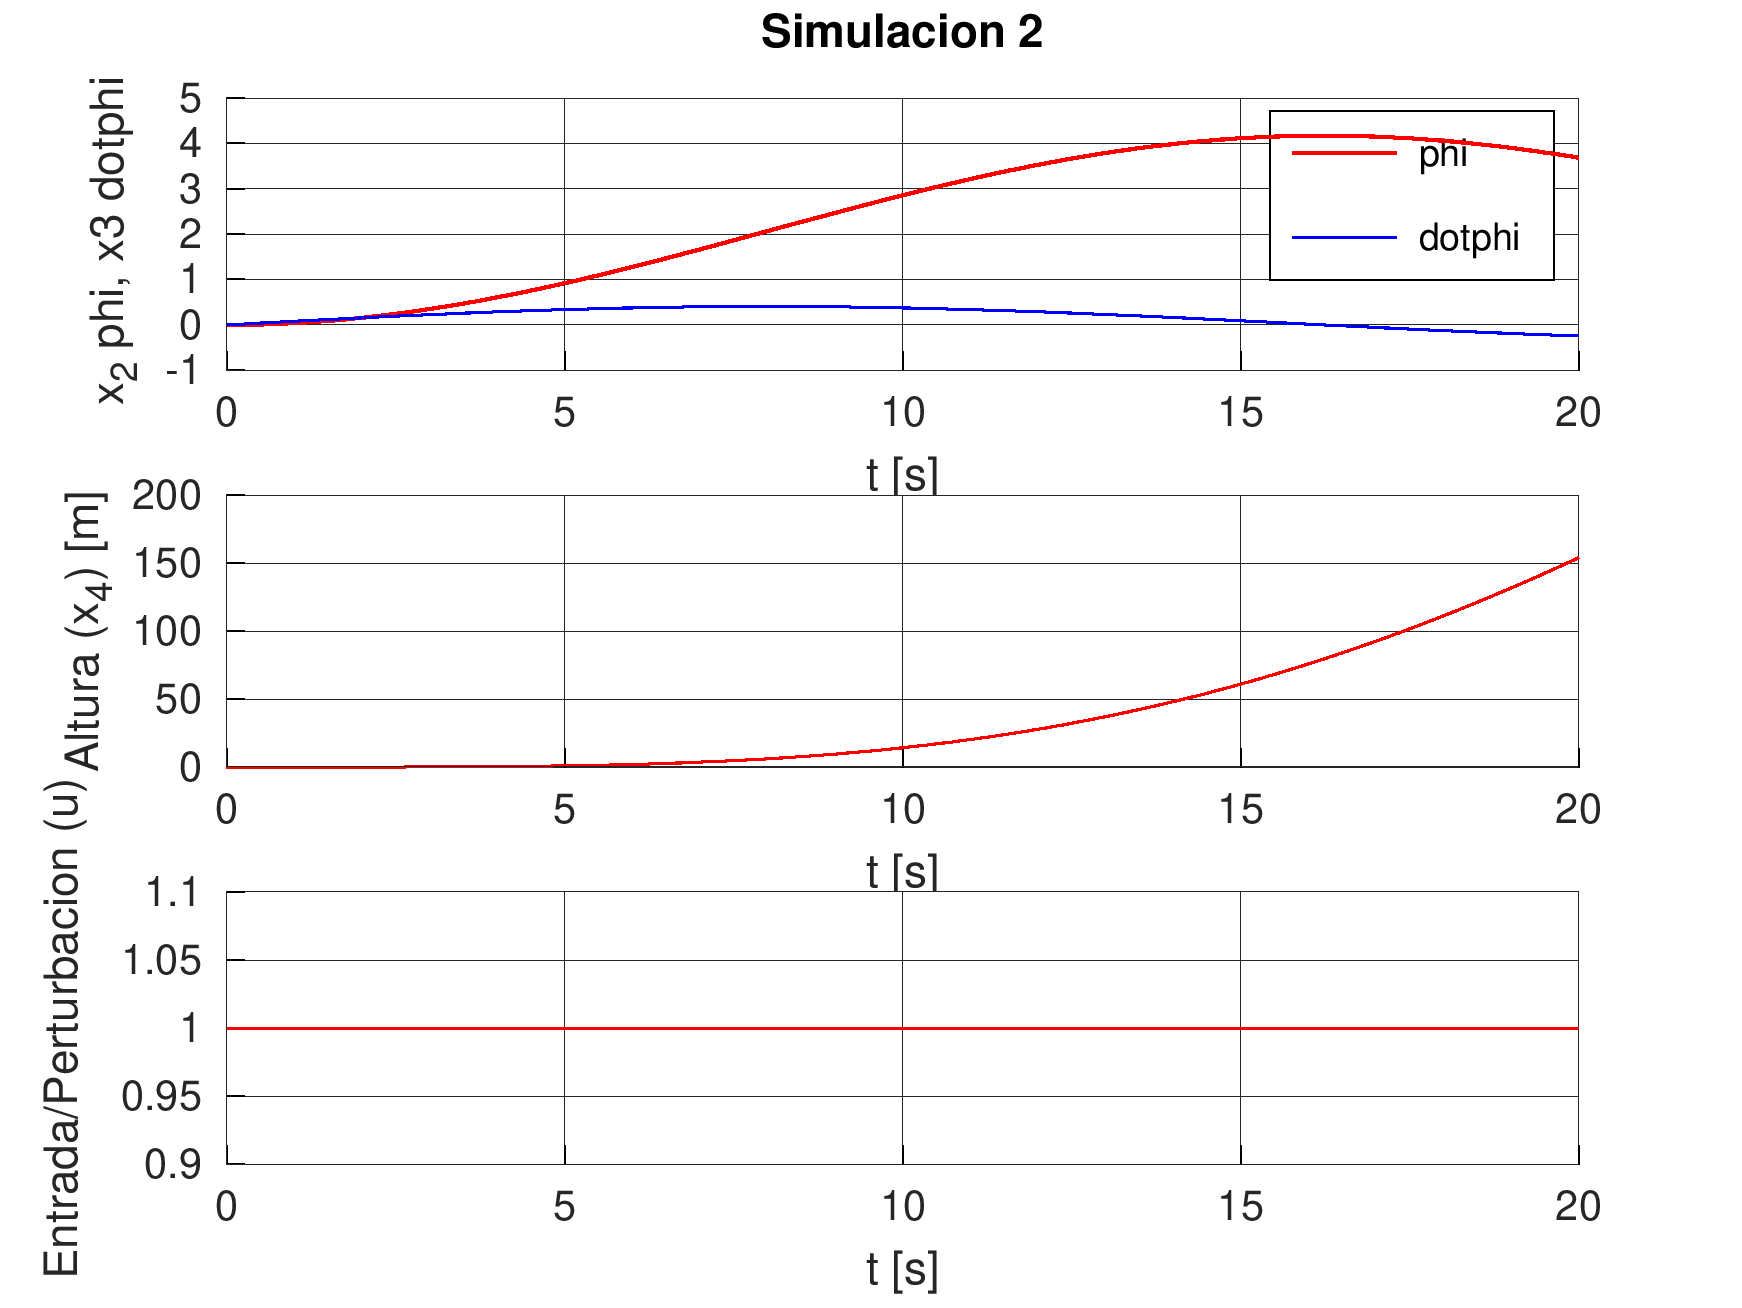

In [ ]:
#Simulacion con Otros valores
imt2 = Image.open("/content/Simavion2.png")
imt2

Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

# Guardado archivos a drive

Para guardar todos los archivos y las imágenes generadas en el Gdrive, se puede proceder mediante el montado en el entorno de trabajo, y luego copiar todo mediante Python. Con la instrucción de Linux `!cp archivo dir_destino` se puede copiar uno por uno todos los archivos.

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil

def copydrive(fname):
    src = os.path.join('/content', fname)
    dst_dir = os.path.join('/content/drive/MyDrive/HCSPD/Semana2')
    dst = os.path.join(dst_dir, fname)

    # Crear el directorio de destino si no existe
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    shutil.copyfile(src, dst)
    print(f"Archivo {fname} copiado a {dst}")

fnames = ['Simavion1.png','Simavion2.png'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  copydrive(fname)

Archivo Simavion1.png copiado a /content/drive/MyDrive/HCSPD/Semana2/Simavion1.png
Archivo Simavion2.png copiado a /content/drive/MyDrive/HCSPD/Semana2/Simavion2.png


# Lecciones aprendidas

Se tuvo dificultad en poder usar el comando plot, no obstante en esta ocasion se obtuvo mas experiencia por el primer trabajao. La dificultad surgio al intentar economizar varios graficos de diversas simulaciones en uno solo.